# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from deepchecks.checks.performance import SimpleModelComparison
from deepchecks.base import Dataset

# Generating data:

In [2]:
np.random.seed(42)

iris = load_iris(as_frame=True)
x = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)
train_ds = Dataset(pd.concat([x_train, y_train], axis=1),
                   features=iris.feature_names,
                   label='target')
val_ds = Dataset(pd.concat([x_test, y_test], axis=1),
                 features=iris.feature_names,
                 label='target')
clf = AdaBoostClassifier()
_ = clf.fit(x_train, y_train)

# Running simple_comparision check:

## Random model check:

In [3]:
check = SimpleModelComparison(simple_model_type='random')

Simple Model Comparison

Compare given model score to simple model score (according to given model type).

The given model performs 3.07 times compared to the simple model using the Accuracy metric. AdaBoostClassifier model prediction has achieved a score of 0.92 compared to Simple random prediction which achieved a score of 0.3 on tested data.

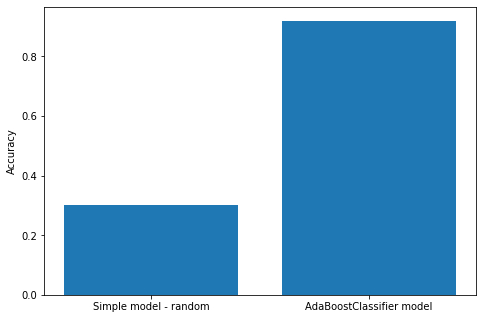

In [4]:
check.run(train_ds, val_ds, clf)

## Tree model check:

In [5]:
check = SimpleModelComparison(simple_model_type='constant')

Simple Model Comparison

Compare given model score to simple model score (according to given model type).

The given model performs 2.42 times compared to the simple model using the Accuracy metric. AdaBoostClassifier model prediction has achieved a score of 0.92 compared to Simple constant prediction which achieved a score of 0.38 on tested data.

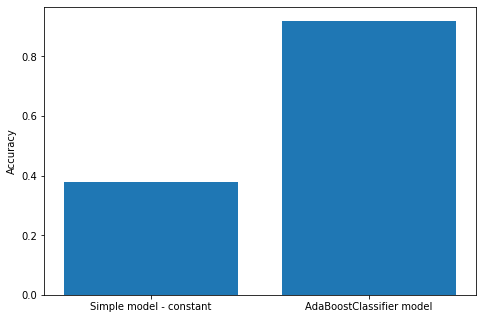

In [6]:
check.run(train_ds, val_ds, clf)